# Classification Model Performance

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/classification_model_performance

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 259 (delta 2), reused 5 (delta 1), pack-reused 252
Receiving objects: 100% (259/259), 41.18 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Updating files: 100% (51/51), done.
/content/machine_learning_1/classification_model_performance


In [ ]:
import pandas
import matplotlib.pyplot as plt

## Loading dataset

First, we use pandas to load the dataset from a csv file.

In [ ]:
data = pandas.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


### Features-labels split and train-validation split

In [ ]:
features = data.drop(["Survived"], axis=1)
labels = data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# remark: we fix random_state the end, to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [ ]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [ ]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


### Training model on our dataset


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

#### Accuracy

In [ ]:
print("Scores of the model")
# use model score to print model accuracy
lr_model.score(features_train, labels_train)

Scores of the model


0.8352059925093633

#### False Positives, False Negatives and Confusion Matrix

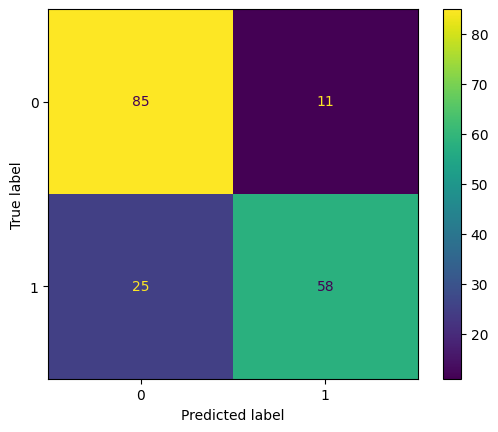

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# use sklearn confusion_matrix, ConfusionMatrixDisplay to plot the confusion matrix
predictions = lr_model.predict(features_test)
cm = confusion_matrix(labels_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Recall, Precision and F1-score

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
# use sklearn f1_score,recall_score,precision_score to print the f1_score,recall_score,precision_score
y_true = labels_test
y_predict = lr_model.predict(features_test)
#y_test = y_test
print(f1_score(y_true, predictions, average=None))
print(recall_score(y_true, predictions, average=None))
print(precision_score(y_true, predictions, average=None))
# don't use average parameter

[0.82524272 0.76315789]
[0.88541667 0.69879518]
[0.77272727 0.84057971]


### ROC and AUC

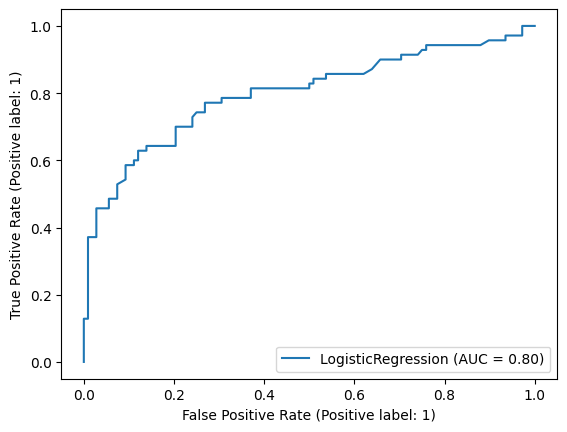

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr_model, features_validation, labels_validation)
plt.show()